# TP4: Les K plus proches voisins (KNN : k nearest neighbors)
 
Le KNN est un algorithme de classification supervisé. Pour chaque entrée $x_{i}=(x^{1}_{i}, x^{1}_{i}, x^{2}_{i}, ... x^{n}_{i}) $ il faut disposer de la sortie $y_{i}$ correspondante (la classe correspondante)

Pour savoir à quelle classe $y_{i}$ un vecteur x apartient il faut:
- Calculer la distance (euclidienne) du vecteur x à tous les examples $x_{i}$
- trouver les k exemple les plus proche de x
- x appartient à la classe majoritairement representé par ces k éléments 

## I-Classe Binaire

### 1. Recuperation des données

Les données sont stocker dans le fichier Titanic.csv qui contient des données des passagers du Titanic. Chaque ligne représente une personne. Les colonnes décrivent différents attributs de la personne, notamment si elle a survécu, son âge, sa classe de passagers, son sexe...

1-Utiliser sns.load_dataset('titanic') de la librairie seaborn pour éecuperer les données de ce fichier 

2-Afficher les 10 premiere ligne de ce dataframe


In [1]:
import seaborn as sns
db = sns.load_dataset('titanic')

In [2]:
# show all the data
db.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 2- Entrainement et test du modèle
Dans un premier lieux, nous allons utiliser comme critères de classifiction suivants:
"age": l'age passager
"sex": le sexe du passager
"pclass": classe de voyage(classe1,classe2,classe3)

1- Transformer la variable qualitatif "sex" en variable numérique( male=0,female=1)

2-Construiser X et Y 

X: les trois colonne "pclass","age" et "sex"

y: "survived"

3- Créer un objet **KNeighborsClassifier** du module **sklearn.neighbors** pour entrainer le model à l'aide la méthode **fit()** du même objet.

4- Utiliser la méthode **score(X,y)** et  **Confusion Matrix**  pour évaluer le modèle pour k=1,3,5,7,9,11 et interpréter le résultat.


In [3]:
# transform 
db['sex'].replace(['male' , 'female'] , [0 , 1] , inplace = True)
db.dropna(inplace = True)

In [4]:
import numpy as np
X = np.array([[i , j , z] for i ,j ,z in zip(db['pclass'].to_list() , db['age'].to_list() , db['sex'].to_list())])
Y = np.array([i for i in db['survived']])

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
model_one  = KNeighborsClassifier(n_neighbors=1)
Y_predect = model_one.fit(X,Y)
model_two  = KNeighborsClassifier(n_neighbors=3)
model_two.fit(X,Y)
model_three= KNeighborsClassifier(n_neighbors=5)
model_three.fit(X,Y)
model_four = KNeighborsClassifier(n_neighbors=7)
model_four.fit(X,Y)
model_five = KNeighborsClassifier(n_neighbors=9)
model_five.fit(X,Y)
model_sex  = KNeighborsClassifier(n_neighbors=11)
model_sex.fit(X,Y)

# print all the values
print("model one   : ",model_one.score(X,Y))
print("model two   : ",model_two.score(X,Y))
print("model three : ",model_three.score(X,Y))
print("model four  : ",model_four.score(X,Y))
print("model five  : ",model_five.score(X,Y))
print("model sex   : ",model_sex.score(X,Y))

model one   :  0.9285714285714286
model two   :  0.8516483516483516
model three :  0.8186813186813187
model four  :  0.7802197802197802
model five  :  0.7692307692307693
model sex   :  0.7527472527472527


In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, model_one.predict(X))

array([[ 54,   5],
       [  8, 115]])

### 3- prediction
Voici des information de trois passagers:

passager1:  {"pclass": 1, "sex":1 , "age": 20}

passager2:  {"pclass": 2, "sex":1 , "age": 7}

passager3:  {"pclass": 3, "sex": 0, "age": 35}

1- Créer un DataFrame à partir de ce données

2- Lequel des passagers vont etre par les survivant?

In [8]:
import pandas as pd
data = {
    
    'passager1': [1, 20 ,1],
    'passager2': [2, 1 , 7],
    'passager3': [3, 35, 0]
    
}
test = pd.DataFrame(pd.DataFrame.from_dict(data, orient='index',  columns=['pclass', 'sex', 'age']))

In [9]:
X_new = np.array([[i , j , z] for i , j , z in zip(test['pclass'].to_list() , test['age'].to_list() , test['sex'].to_list())])
model_two.predict(X_new)

array([0, 1, 0])

## II-Multiple Classes

#### ***Q1***-utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer trois classes puis visualiser ces trois classe comme suivants:
*   rouge: y=0
*   blue: y=1
*   vert: y=2
*   Orange: y=3

l'argument ***cluster_std*** affecte le chevauchement entre les classe
<img src="KNN.png" style="with:150px;height:280px"/>

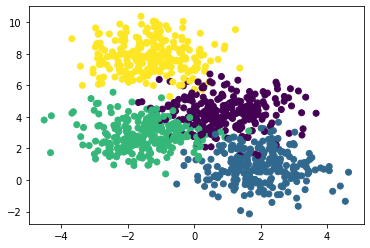

array([[-2.50804312,  7.86408052],
       [ 0.4666179 ,  3.86571303],
       [-2.94062621,  8.56480636],
       ...,
       [-1.13551783,  8.49272771],
       [-1.22933367,  7.75342586],
       [ 3.90485877,  0.683497  ]])

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, Y = make_blobs(n_samples=1000 , centers=4, n_features=2 , random_state=0)
plt.scatter(X[:,0] , X[:,1] , c = Y)
plt.show()
X

In [6]:
X

array([[-2.50804312,  7.86408052],
       [ 0.4666179 ,  3.86571303],
       [-2.94062621,  8.56480636],
       ...,
       [-1.13551783,  8.49272771],
       [-1.22933367,  7.75342586],
       [ 3.90485877,  0.683497  ]])

#### ***Q2***  Ecrire un script pour predire la classe de x avec l'algorithme du kNN  et évaluer le modèle pour k=1,3,5,7,9,11 et interpréter le résultat.


In [18]:
model_one  = KNeighborsClassifier(n_neighbors=1)
model_one.fit(X,Y)
model_two  = KNeighborsClassifier(n_neighbors=3)
model_two.fit(X,Y)
model_three= KNeighborsClassifier(n_neighbors=5)
model_three.fit(X,Y)
model_four = KNeighborsClassifier(n_neighbors=7)
model_four.fit(X,Y)
model_five = KNeighborsClassifier(n_neighbors=9)
model_five.fit(X,Y)
model_sex  = KNeighborsClassifier(n_neighbors=11)
model_sex.fit(X,Y)

# print all the values
print("model one   : ",model_one.score(X,Y))
print("model two   : ",model_two.score(X,Y))
print("model three : ",model_three.score(X,Y))
print("model four  : ",model_four.score(X,Y))
print("model five  : ",model_five.score(X,Y))
print("model sex   : ",model_sex.score(X,Y))

model one   :  1.0
model two   :  0.955
model three :  0.943
model four  :  0.938
model five  :  0.941
model sex   :  0.942


#### Q3. A quelle classe apartient les trois points suivants: x1=(-2,8); x2(2,6) ;x3=(0,2) et x4=(4,2) 

In [19]:
import numpy as np
X1 = np.array([[-2 , 8]])
X2 = np.array([[2 ,  6]])
X3 = np.array([[0 ,  2]])
X4 = np.array([[4 ,  2]])

In [20]:
model_one.predict(X1)
print("For X1 = ",model_four.predict(X1))
print("For X2 = ",model_four.predict(X2))
print("For X3 = ",model_four.predict(X3))
print("For X4 = ",model_four.predict(X4))

For X1 =  [3]
For X2 =  [0]
For X3 =  [2]
For X4 =  [1]
